<a href="https://colab.research.google.com/github/mikedcurry/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Curry_DS_114_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas
- df filtering, list comprehension, .apply functions

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
# Well, poo! It looks like I recreated the whole assignment with the wrong dataset. 
# I'm copying and pasting the right one up the point of designating it as the df. 
# Hope that works for me...

In [109]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-11 20:09:08--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   846KB/s    in 26s     

2019-07-11 20:09:35 (833 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22559146]



In [36]:
!wget https://resources.lendingclub.com/LoanStats3a.csv.zip

--2019-07-11 16:30:59--  https://resources.lendingclub.com/LoanStats3a.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats3a.csv.zip.2’

LoanStats3a.csv.zip     [         <=>        ]   1.62M   784KB/s               ^C


In [110]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [37]:
!unzip LoanStats3a.csv.zip

Archive:  LoanStats3a.csv.zip
replace LoanStats3a.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [38]:
!head LoanStats3a.csv


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [39]:
!tail LoanStats3a.csv


"","","6500","6500","0"," 36 months","  9.64%","208.66","B","B4","Air Force","< 1 year","RENT","20000","Not Verified","Jun-2007","Does not meet the credit policy. Status:Charged Off","n","","I'm in the military and before I came in I racked up a large credit card debt. With all the different payments to keep track of and extra charges it is really hard to get out from under them. With just one payment a month it would make my life easier, so I can concentrate on my job.","other","One-Debt Loan","064xx","CT","10","","","","","","","","0","","","f","0.00","0.00","7193.06","0.00","1791.32","503.81","0.0","4897.93","1714.27","May-2008","208.65","Dec-2008","Jun-2019","","","1","Individual","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","3500","3500","225"," 36 

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

pd.set_option('display.max_rows', 500) #adjust display options
pd.set_option('display.max_columns', 500)

In [165]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.shape)


(128412, 144)


In [42]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.0

In [112]:
df['int_rate'].isnull().sum()


0

In [0]:
df = df.dropna(subset=['int_rate'])

In [76]:
df['int_rate'].isnull().sum()

0

In [0]:
#df.head(0)

In [0]:
df_chopped = df.drop(['inq_fi','num_tl_op_past_12m','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq'], axis='columns') 



## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
#df.dtypes

In [51]:
#int_rate

'10.56%'.strip('%')

'10.56'

In [52]:
type('10.56%'.strip('%'))

str

In [53]:
float('10.56%'.strip('%'))

10.56

**LIST COMPREHENSION EXAMPLE**

In [64]:
example_list = ['12.54%', '6.43%', '9.99%']

def remove_percent(string):
  return float(string.strip('%'))

[remove_percent(item) for item in example_list]

[12.54, 6.43, 9.99]

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

In [80]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,6

In [81]:
df.describe(exclude='number')

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,0.0,42535,42535,42535,39909,41423,42535,42535,42535,42535,42535,29242,42535,42522,42535,42535,42506,42445,42535,42452,2749,42531,42535,42535,42535,160,160,160
unique,0.0,2,7,35,30658,11,5,3,55,4,1,28963,14,21264,837,50,530,1119,1,112,98,143,1,1,2,65,3,61
top,NaN,36 months,B,B3,US Army,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,,debt_consolidation,Debt Consolidation,100xx,CA,Oct-1999,0%,f,Mar-2013,Mar-2011,Jun-2019,Individual,N,N,Jun-2017,COMPLETE,Sep-2013
freq,NaN,31534,12389,2997,139,9369,20181,18758,2267,34116,42535,225,19776,2259,649,7429,393,1070,42535,1070,107,8446,42535,42535,42375,18,145,8


**List Comprehension Example**

In [82]:
example_list = ['13.56%','13.57%','13.58%']

[remove_percent(string) for string in example_list]

#neat!

[13.56, 13.57, 13.58]

### Clean `emp_title`

Look at top 20 titles

In [84]:
df['emp_title']

0                                                      NaN
1                                                    Ryder
2                                                      NaN
3                                      AIR RESOURCES BOARD
4                                 University Medical Group
5                                     Veolia Transportaton
6                                Southern Star Photography
7                                          MKC Accounting 
8                                                      NaN
9                                                Starbucks
10                                   Southwest Rural metro
11                                                    UCLA
12                     Va. Dept of Conservation/Recreation
13                                                  Target
14                                                   SFMTA
15                                Internal revenue Service
16                                       Chin's Restaura

In [85]:
print(df['emp_title'].value_counts(dropna=False).shape)

(30659,)


How often is `emp_title` null?

In [86]:
df['emp_title'].isnull().sum()

2626

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [88]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [89]:
df['emp_title'] = df['emp_title'].apply(clean_title)
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head()

(28927,)


Unknown            2626
Us Army             221
Bank Of America     146
Walmart              85
At&T                 85
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [90]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Unknown,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Unknown,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f

### **Dataframe Filtering**

In [0]:
managers = df[df['emp_title_manager'] == True]
plebs = df[df['emp_title_manager'] == False]

In [92]:
print(managers['int_rate'].mean())
print(plebs['int_rate'].mean())

#ha! 

11.700000000000001
12.16505936845943


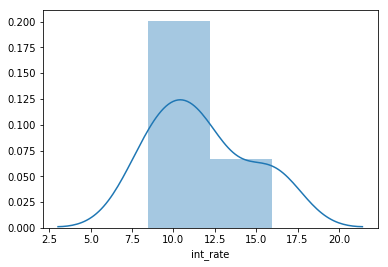

In [93]:
import seaborn as sns
sns.distplot(managers['int_rate'])

In [95]:
managers.shape

#ugh

(4, 145)

In [0]:
#CLEARLY I STARTED WITH A DIFFERENT DATASET, BUT i DON'T THINK IT WILL MAKE A DIFERENCE IN WHAT i'VE LEARNED...

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [97]:
df['issue_d'].head().values

array(['Dec-2011', 'Dec-2011', 'Dec-2011', 'Dec-2011', 'Dec-2011'],
      dtype=object)

In [98]:
df['issue_d'].describe()

count        42535
unique          55
top       Dec-2011
freq          2267
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [100]:
df['issue_d'].head().values

array(['2011-12-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [101]:
df.dtypes

# :)

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

In [102]:
df['issue_d'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
30       2011
31       2011
32       2011
33       2011
34       2011
35       2011
36       2011
37       2011
38       2011
39       2011
40       2011
41       2011
42       2011
43       2011
44       2011
45       2011
46       2011
47       2011
48       2011
49       2011
50       2011
51       2011
52       2011
53       2011
54       2011
55       2011
56       2011
57       2011
58       2011
59       2011
60       2011
61       2011
62       2011
63       2011
64       2011
65       2011
66       2011
67       2011
68       2011
69       2011
70       2011
71    

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [104]:
df['issue_d'].dt.month

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
30       12
31       12
32       12
33       12
34       12
35       12
36       12
37       12
38       12
39       12
40       12
41       12
42       12
43       12
44       12
45       12
46       12
47       12
48       12
49       12
50       12
51       12
52       12
53       12
54       12
55       12
56       12
57       12
58       12
59       12
60       12
61       12
62       12
63       12
64       12
65       12
66       12
67       12
68       12
69       12
70       12
71       12
72       12
73       12
74       12
75       12
76       12
77       12
78       12
79       12
80       12
81       12
82       12
83  

In [0]:
df['issue_month'] = df['issue_d'].dt.month


In [106]:
df['issue_month'].value_counts()

12    4685
11    4439
10    4181
9     3873
8     3729
7     3694
6     3494
5     3167
4     3067
3     3002
1     2616
2     2588
Name: issue_month, dtype: int64

In [151]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# hmmm.... don't have an earliest credit line feature in this set...

In [0]:
# I think I get it enough to move on.

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

**Convert Column 'term' to integer:**

In [113]:
df['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object

In [0]:
def remove_months(string):
  return int(string.strip(' months'))

In [116]:
df['term'].isnull().sum()

0

In [0]:
df['term'] = df['term'].apply(remove_months)

In [124]:
df['term'].head()

#Sweetness.

0    36
1    60
2    36
3    36
4    36
Name: term, dtype: int64

**Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.**

In [128]:
df['loan_status'].value_counts()

Current               114514
Fully Paid              9785
Late (31-120 days)      1878
Charged Off             1028
In Grace Period          807
Late (16-30 days)        397
Default                    3
Name: loan_status, dtype: int64

In [148]:
d = {'Current': 1 , 'Fully Paid':1,'Late (31-120 days)': 0, 'Charged Off': 0, 'In Grace Period': 0, 'Late (16-30 days)': 0, 'Default':0}
df['loan_status_is_great'] = df['loan_status'].map(d)
df.head()

#had my map backwards, didn't think it would make a diference, gave up for a while, then came back

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_is_great
0,NaN,NaN,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,25000,25000,25000.0,60,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,10000,10000,10000.0,36,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3

In [150]:
df[['loan_status', 'loan_status_is_great']].head(20)

,loan_status,loan_status_is_great
0,Current,1
1,Current,1
2,Current,1
3,Current,1
4,Current,1
5,Current,1
6,Current,1
7,Current,1
8,Current,1
9,Current,1


In [137]:
df['loan_status'].head()

0    Current
1    Current
2    Current
3    Current
4    Current
Name: loan_status, dtype: object

In [134]:
#Fail

def convert_status(str):
  if str='Current'
    return 1
  elif str='Fully Paid'
   return 1
  else
    return 0
  

[convert_status(x) for x in examplez]

SyntaxError: ignored

In [0]:
#Would have worked... went back to original idea on using map

df['loan_status_is_great'] = df['loan_status'].replace(to_replace = 'Current', value = 1)
df['loan_status_is_great'] = df['loan_status'].replace(to_replace = 'Fully Paid', value = 1)
df['loan_status_is_great'] = df['loan_status'].replace(to_replace = , value = 0)
df['loan_status_is_great'] = df['loan_status'].replace(to_replace = 'Fully Paid', value = 0)
df['loan_status_is_great'] = df['loan_status'].replace(to_replace = 'Fully Paid', value = 0)
df['loan_status_is_great'] = df['loan_status'].replace(to_replace = 'Fully Paid', value = 0)

In [139]:
df['loan_status_is_great'].head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status_is_great, dtype: object

**Make last_pymnt_d_month and last_pymnt_d_year columns:**

In [154]:
df['last_pymnt_d'].head().values

array(['Jun-2019', 'May-2019', 'May-2019', 'May-2019', 'Jun-2019'],
      dtype=object)

In [155]:
df['last_pymnt_d'].describe()

count       128253
unique          10
top       Jun-2019
freq        103574
Name: last_pymnt_d, dtype: object

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [167]:
df['last_pymnt_d'].head().values

array(['2019-06-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [161]:
df['last_pymnt_d'].dt.year

0         2019.0
1         2019.0
2         2019.0
3         2019.0
4         2019.0
5         2019.0
6         2019.0
7         2019.0
8         2019.0
9         2019.0
10        2019.0
11        2019.0
12        2019.0
13        2019.0
14        2019.0
15        2019.0
16        2019.0
17        2019.0
18        2019.0
19        2019.0
20        2019.0
21        2019.0
22        2019.0
23        2019.0
24        2019.0
25        2019.0
26        2019.0
27        2019.0
28        2019.0
29        2019.0
30        2019.0
31        2019.0
32        2019.0
33        2019.0
34        2019.0
35        2019.0
36        2019.0
37        2019.0
38        2019.0
39        2019.0
40        2019.0
41        2019.0
42        2019.0
43        2019.0
44        2019.0
45        2019.0
46        2019.0
47        2019.0
48        2019.0
49        2019.0
50        2019.0
51        2019.0
52        2019.0
53        2019.0
54        2019.0
55        2019.0
56        2019.0
57        2019.0
58        2019

In [0]:
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

In [175]:
df['last_pymnt_d_year'].head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

In [176]:
df['last_pymnt_d_year'] = df['last_pymnt_d_year'].astype('int64')

ValueError: ignored

In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month

In [171]:
df['last_pymnt_d_month'].head()

0    6.0
1    5.0
2    5.0
3    5.0
4    6.0
Name: last_pymnt_d_month, dtype: float64

In [0]:
def convert_to_(string):
  return float(string.strip('%'))

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01